# Tensorflow First Tutorial
## MIST : Basic Classification

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Importing the fashion_mist dataset.

60000 images for training set and 10000 images for testing set.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 77s 17us/step


Creating the images class labels, 10 different classes.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's understand what our dataset is made of :

In [12]:
print(train_images.shape)
print(train_labels)

(60000, 28, 28)
[9 0 0 ... 3 0 5]


We can see that the dimention of our set is : (60000,28,28). This means that our set contains 60000 images of 28 by 28 pixels. 
The label array contains integers from 0 to 9, corresponding to the 10 different categories we are training on. The data is already prelable.
The id's are declared :

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

## Let's see what the first image looks like.

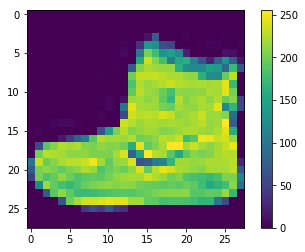

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

We divide the values by 255.0 so we get floats from 0 to 1

## Let's now plot the first ten images

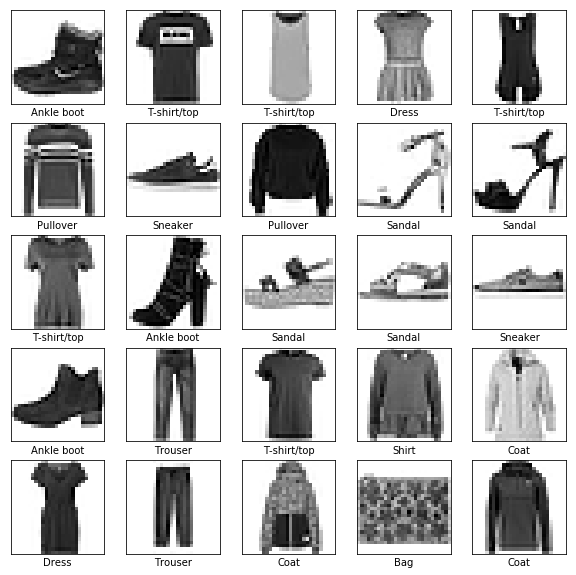

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Let's build a model

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Let's understand the role of each layer:
    The first layer is the *Flatten layer* it is used to flatten a 2d array (the image) to a 1d array (a 784=28x28 array). 
     The second layer is a dense layer, it takes in entry the 128 pixels of the array. 
     The third one returns the probability of the image being one of the 10 categories.

In [20]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Loss function —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

## Let's train the model

In [21]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 1.0906 - acc: 0.6691
Epoch 2/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.6420 - acc: 0.7689
Epoch 3/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.5667 - acc: 0.7965
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.5250 - acc: 0.8136
Epoch 5/5
60000/60000 [==============================] - 5s 77us/step - loss: 0.4976 - acc: 0.8248


We see that only 5 epoch are necessary to obtain a decent accuracy (about 82%)

## Let's evaluate the model accuracy using the test set

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/step
('Test accuracy:', 0.6818)


We have achieved an accuracy of 68% on the test set, this is due to the fact that our model has never seen this data. 

## Let's make prediction on our test data

In [24]:
predictions = model.predict(test_images)

In [25]:
### To visualise our predictions we plot the results

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

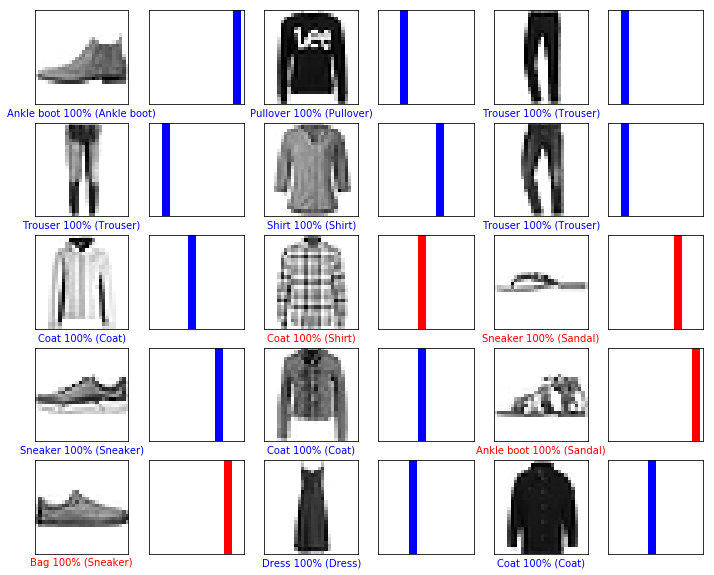

In [27]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)